In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paytm-revenue-users-transactions/Paytm.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# sns.get_dataset_names() #list of built in datasets in seaborn

## Loading Data

In [4]:
df = pd.read_csv('/kaggle/input/paytm-revenue-users-transactions/Paytm.csv')

In [5]:
pd.set_option('display.max_columns',22)

In [6]:
df

,Date,Gross Merchandise Value,Merchant Transactions,Total Transactions,Average Monthly Transacting Users (MTU),Registered Merchants (end of period),"Payment Devices (cumulative, end of period)",Volume of loans distributed,Postpaid Loans,Personal Loans,Merchant Loans,Value of loans distributed,Postpaid Loans.1,Personal Loans.1,Merchant Loans.1,Payments Services to Consumers,Payments Services to Merchants,Other Operating Revenue,Total Payments Revenue,Payment processing charges,Net Payments Margin
0,01-06-2020,0.70,969,1231,39.7,17.0,0.0,23,20,0,3,44,19,1,23,NaN,NaN,NaN,NaN,NaN,NaN
1,01-09-2020,0.95,1232,1578,43.0,18.5,0.3,349,332,0,17,206,74,2,129,NaN,NaN,NaN,NaN,NaN,NaN
2,01-12-2020,1.12,1587,2038,47.1,20.0,0.6,881,851,5,25,468,234,25,208,NaN,NaN,NaN,NaN,NaN,NaN
3,01-03-2021,1.27,2084,2558,50.4,21.1,0.8,1381,1355,9,17,687,416,68,203,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2021,1.47,2287,2785,50.4,21.8,0.9,1433,1413,13,6,632,447,111,73,301.0,334.0,-,635.0,-527.0,108.0
5,01-09-2021,1.96,2692,3316,57.4,23.0,1.3,2841,2790,29,23,1257,738,246,273,354.0,400.0,-,754.0,-670.0,84.0
6,01-12-2021,2.50,3477,4266,64.4,24.9,2.0,4414,4320,60,35,2181,1190,516,474,406.0,586.0,-,992.0,-783.0,209.0
7,01-03-2022,2.59,4142,5029,70.9,26.7,2.9,6544,6414,92,38,3553,2183,805,565,469.0,572.0,-,1041.0,-774.0,266.0
8,01-06-2022,2.96,5124,6126,74.8,28.3,3.8,8478,8286,132,60,5554,3383,1344,827,519.0,557.0,-,1075.0,-694.0,382.0
9,01-09-2022,3.18,5752,6885,79.7,29.5,4.8,9192,8924,189,80,7313,4050,2055,1208,549.0,624.0,15,1188.0,-746.0,443.0


## Formatting Data

**Checking Data Types**

In [7]:
df.dtypes

Date                                            object
Gross Merchandise Value                        float64
Merchant Transactions                            int64
Total Transactions                               int64
Average Monthly Transacting Users (MTU)        float64
Registered Merchants (end of period)           float64
Payment Devices (cumulative, end of period)    float64
Volume of loans distributed                      int64
  Postpaid Loans                                 int64
  Personal Loans                                 int64
  Merchant Loans                                 int64
Value of loans distributed                       int64
  Postpaid Loans.1                               int64
  Personal Loans.1                               int64
  Merchant Loans.1                               int64
Payments Services to Consumers                 float64
Payments Services to Merchants                 float64
Other Operating Revenue                         object
Total Paym

In [8]:
df['Date '] = pd.to_datetime(df['Date '],format = '%d-%m-%Y') # It will make date in format "YYYY-MM-DD"

In [9]:
df.replace('-',np.NaN,inplace=True) #Replacing dash by numpy NaN

In [10]:
df['Other Operating Revenue'] = df['Other Operating Revenue'].astype('float')

In [11]:
df

,Date,Gross Merchandise Value,Merchant Transactions,Total Transactions,Average Monthly Transacting Users (MTU),Registered Merchants (end of period),"Payment Devices (cumulative, end of period)",Volume of loans distributed,Postpaid Loans,Personal Loans,Merchant Loans,Value of loans distributed,Postpaid Loans.1,Personal Loans.1,Merchant Loans.1,Payments Services to Consumers,Payments Services to Merchants,Other Operating Revenue,Total Payments Revenue,Payment processing charges,Net Payments Margin
0,2020-06-01,0.70,969,1231,39.7,17.0,0.0,23,20,0,3,44,19,1,23,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01,0.95,1232,1578,43.0,18.5,0.3,349,332,0,17,206,74,2,129,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01,1.12,1587,2038,47.1,20.0,0.6,881,851,5,25,468,234,25,208,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-01,1.27,2084,2558,50.4,21.1,0.8,1381,1355,9,17,687,416,68,203,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-06-01,1.47,2287,2785,50.4,21.8,0.9,1433,1413,13,6,632,447,111,73,301.0,334.0,NaN,635.0,-527.0,108.0
5,2021-09-01,1.96,2692,3316,57.4,23.0,1.3,2841,2790,29,23,1257,738,246,273,354.0,400.0,NaN,754.0,-670.0,84.0
6,2021-12-01,2.50,3477,4266,64.4,24.9,2.0,4414,4320,60,35,2181,1190,516,474,406.0,586.0,NaN,992.0,-783.0,209.0
7,2022-03-01,2.59,4142,5029,70.9,26.7,2.9,6544,6414,92,38,3553,2183,805,565,469.0,572.0,NaN,1041.0,-774.0,266.0
8,2022-06-01,2.96,5124,6126,74.8,28.3,3.8,8478,8286,132,60,5554,3383,1344,827,519.0,557.0,NaN,1075.0,-694.0,382.0
9,2022-09-01,3.18,5752,6885,79.7,29.5,4.8,9192,8924,189,80,7313,4050,2055,1208,549.0,624.0,15.0,1188.0,-746.0,443.0


## Analyzing Data

In [12]:
#Adding new column person to person transaction which will count number of transactions made person to person in millions
df['person_to_person_transactions'] = df['Total Transactions'] - df['Merchant Transactions']
df['person_to_person_transactions'] # in millions

0      262
1      346
2      451
3      474
4      498
5      624
6      789
7      887
8     1002
9     1133
10    1350
11    1499
Name: person_to_person_transactions, dtype: int64

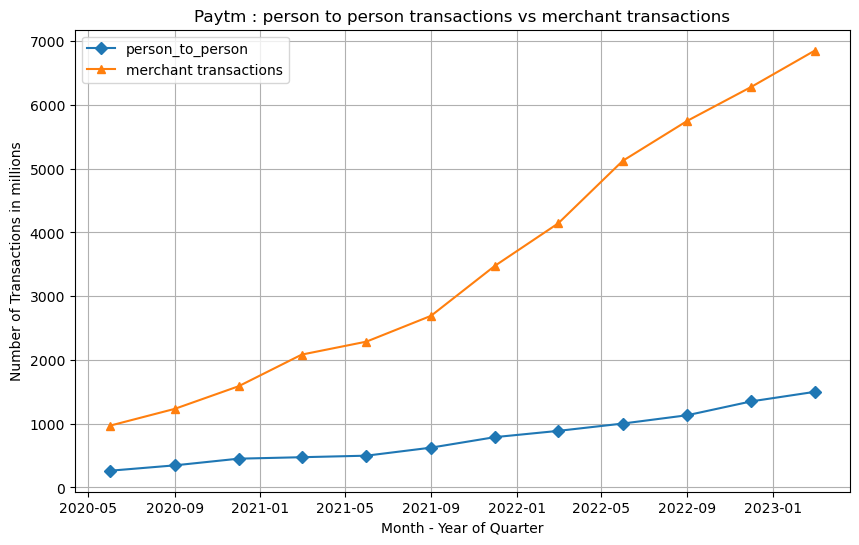

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df['Date '],df['person_to_person_transactions'],label='person_to_person',marker = 'D')
plt.plot(df['Date '],df['Merchant Transactions'],label= 'merchant transactions', marker ='^')
plt.title('Paytm : person to person transactions vs merchant transactions')
plt.xlabel('Month - Year of Quarter')
plt.ylabel('Number of Transactions in millions')
plt.grid(True)
plt.legend()
plt.show()

<h3> Observation </h3>
<h5>Number person to person transactions is much lower than merchant to merchant and difference between both is increasing over time.</h5>

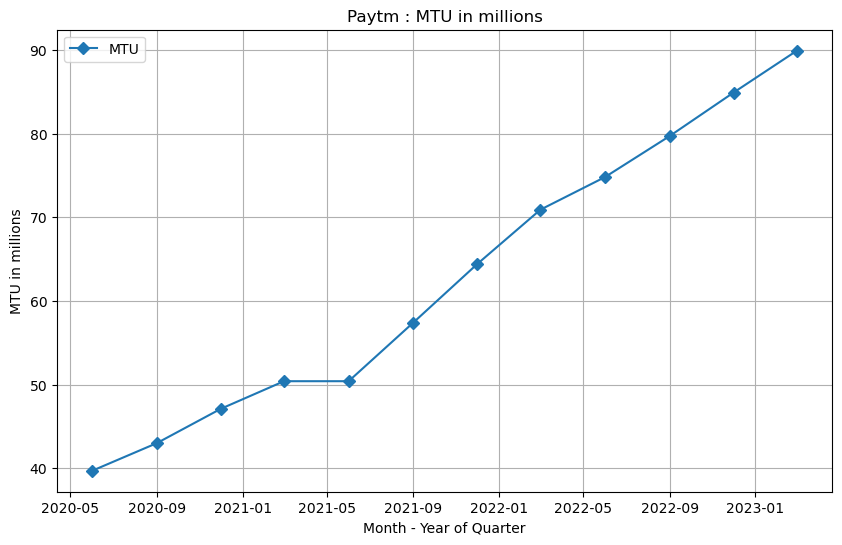

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df['Date '],df['Average Monthly Transacting Users (MTU)'],label='MTU',marker= 'D')
plt.title('Paytm : MTU in millions')
plt.xlabel('Month - Year of Quarter')
plt.ylabel('MTU in millions')
plt.grid(True)
plt.legend()
plt.show()


<h3>Observation </h3>
<h5>Monthly Active Users of Paytm is now over 90 millions.</h5>

In [15]:
mtu_percent_change = list()
count = 0
for i in df['Average Monthly Transacting Users (MTU)']:
    if count == 0:
        pass
    else:
        this_quarter = i
        change_percent = ((this_quarter - last_quarter)*100)/last_quarter
        mtu_percent_change.append(change_percent)
    last_quarter = i
    count = count+1
    
mtu_percent_change

[8.312342569269514,
 9.534883720930235,
 7.006369426751586,
 0.0,
 13.88888888888889,
 12.195121951219525,
 10.093167701863353,
 5.500705218617759,
 6.550802139037441,
 6.524466750313679,
 5.889281507656065]

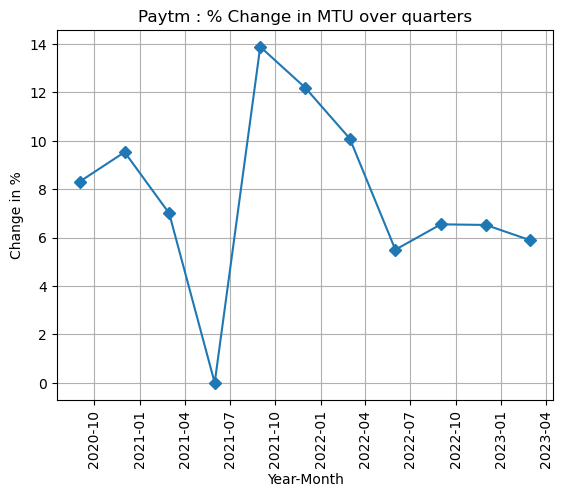

In [16]:
date = df['Date '].iloc[1:]
plt.plot(date,mtu_percent_change,marker='D')
plt.title('Paytm : % Change in MTU over quarters')
plt.xlabel('Year-Month')
plt.ylabel('Change in %')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

<h3> Observation </h3>
<h5>Monthly Active users of Paytm decreased from last quarter by 1% approx. Paytm seen much fluctuation in MTU in long term.</h5>

**Note for Following Viz : Postpaid Loans include merchant loans and Personal Loans.**

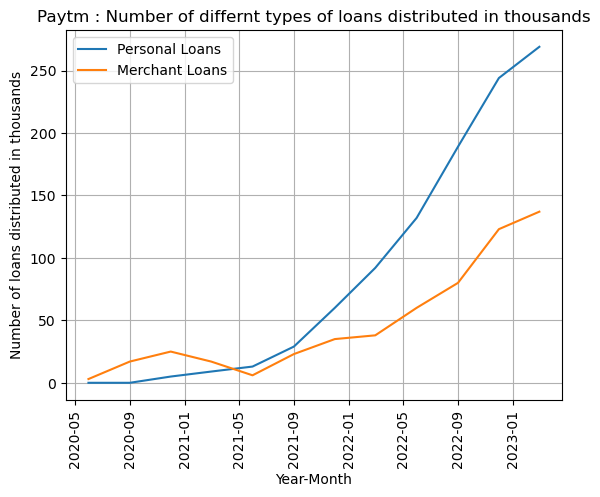

In [17]:
plt.plot(df['Date '],df['  Personal Loans'],label= 'Personal Loans')
plt.plot(df['Date '],df['  Merchant Loans'],label= 'Merchant Loans')
plt.title('Paytm : Number of differnt types of loans distributed in thousands')
plt.xlabel('Year-Month')
plt.ylabel('Number of loans distributed in thousands')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

<h3> Observation </h3>
<h5>Number of personal loans is much higher than merchant and it is increasing over time.</h5>

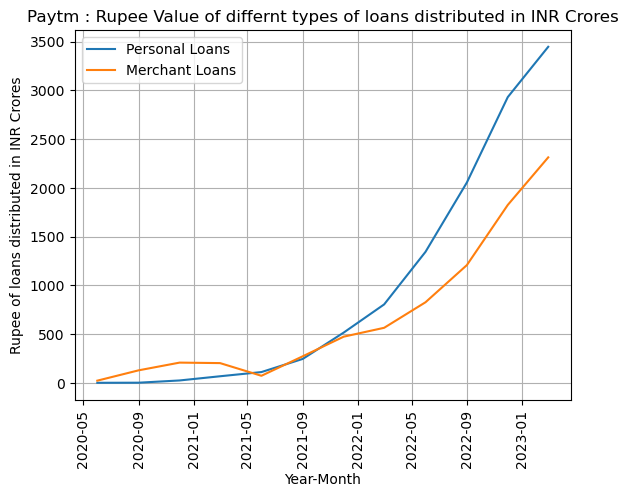

In [18]:
plt.plot(df['Date '],df['  Personal Loans.1'],label= 'Personal Loans')
plt.plot(df['Date '],df['  Merchant Loans.1'],label= 'Merchant Loans')
plt.title('Paytm : Rupee Value of differnt types of loans distributed in INR Crores')
plt.xlabel('Year-Month')
plt.ylabel('Rupee of loans distributed in INR Crores')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

<h3> Observation </h3>
<h5>Rupee Value of personal loans is much higher than merchant and it is increasing over time.</h5>

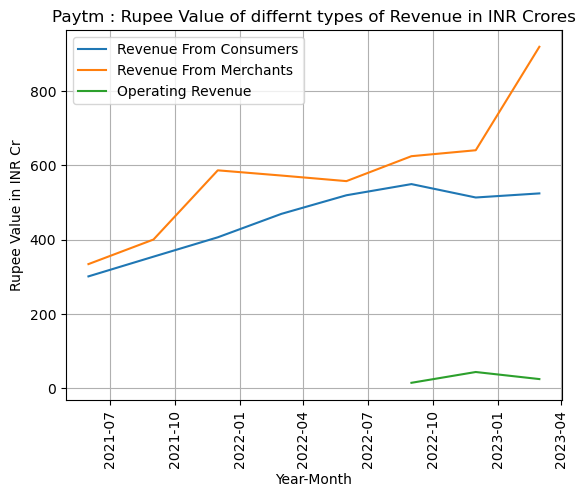

In [19]:
plt.plot(df['Date '],df['Payments Services to Consumers'],label='Revenue From Consumers')
plt.plot(df['Date '],df['Payments Services to Merchants'],label= 'Revenue From Merchants')
plt.plot(df['Date '],df['Other Operating Revenue'],label= 'Operating Revenue')
plt.title('Paytm : Rupee Value of differnt types of Revenue in INR Crores')
plt.xlabel('Year-Month')
plt.ylabel('Rupee Value in INR Cr')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

<h3> Observation </h3>
<h5>Amount of Revenue generated by in following order : Merchant Revenue > Consumer Revenue > Operating Revenue</h5>

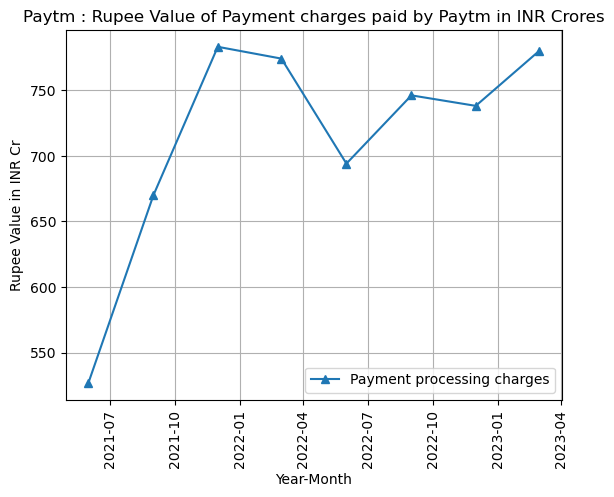

In [20]:
df['Payment processing charges'] = df['Payment processing charges'].agg(np.abs)
plt.plot(df['Date '],df['Payment processing charges'],label='Payment processing charges',marker='^')
plt.title('Paytm : Rupee Value of Payment charges paid by Paytm in INR Crores')
plt.xlabel('Year-Month')
plt.ylabel('Rupee Value in INR Cr')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

<h3> Observation </h3>
<h5>Payment Processing Charges are those charges that paid by Paytm and it increased over time.</h5>

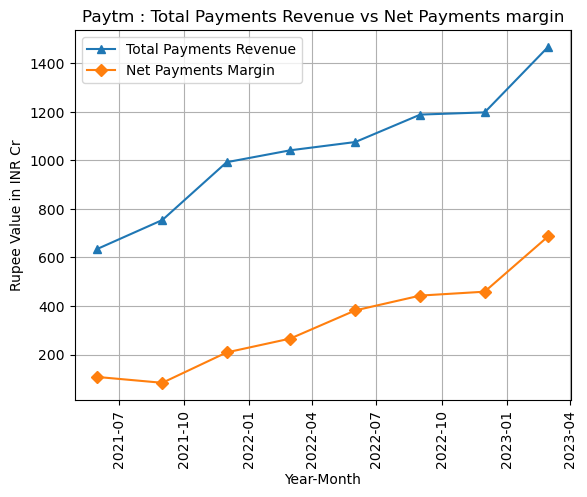

In [21]:
plt.plot(df['Date '],df['Total Payments Revenue'],label='Total Payments Revenue',marker='^')
plt.plot(df['Date '],df['Net Payments Margin'],label='Net Payments Margin',marker='D')
plt.title('Paytm : Total Payments Revenue vs Net Payments margin')
plt.xlabel('Year-Month')
plt.ylabel('Rupee Value in INR Cr')
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

<h3> Observation </h3>
<h5>Total payments revenue and Net Payments Margin (Total payments revenue-Payment Processing Charges) is increased over time and at its highest value.</h5>